## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score

df = pd.read_csv('student-data.csv')
dfv = pd.read_csv('student-data.csv')

# Import Data

In [2]:
df = pd.read_csv('student-data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [7]:
df.shape

(395, 31)

## Data Pre-Processing

1. Datasets may contain non-number values that cannot be fed to a classifier. Consequently, it is our responsibility to convert non-numerical values into numerical ones.
2. **Feature scaling** is the technique to bring all the features to the same scale. If we don’t bring the features to the same scale, the model tends to give higher weightage to higher values and lower weightage to lower values irrespective of the units of values. Feature scaling is bringing continuous variables to the same scale.

In [8]:
# mapping strings to numeric values:
def numerical_data():
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['sex'] = df['sex'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
    col = df['passed']
    del df['passed']
    df['passed'] = col

    
# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col


In [9]:
numerical_data()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,1,18,0,1,1,4,4,3,0,...,0,0,4,3,4,1,1,3,6,0
1,0,1,17,0,1,0,1,1,3,4,...,1,0,5,3,3,1,1,3,4,0
2,0,1,15,0,0,0,1,1,3,4,...,1,0,4,3,2,2,3,3,10,1
3,0,1,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,2,1
4,0,1,16,0,1,0,3,3,4,4,...,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,0,0,1,2,2,2,2,...,0,0,5,5,4,4,5,4,11,0
391,1,0,17,0,0,0,3,1,2,2,...,1,0,2,4,5,3,4,2,3,1
392,1,0,21,1,1,0,1,1,4,4,...,0,0,5,5,3,3,3,3,3,0
393,1,0,18,1,0,0,3,2,2,4,...,1,0,4,4,1,3,4,5,0,1


In [10]:
feature_scaling(df)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,1.0,0.059264,0.0,1.0,1.0,1.00,1.00,0.75,0.00,...,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.003882,0.0
1,0.0,1.0,0.013809,0.0,1.0,0.0,0.25,0.25,0.75,1.00,...,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.50,-0.022785,0.0
2,0.0,1.0,-0.077100,0.0,0.0,0.0,0.25,0.25,0.75,1.00,...,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.057215,1.0
3,0.0,1.0,-0.077100,0.0,1.0,0.0,1.00,0.50,0.25,0.50,...,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.00,-0.049451,1.0
4,0.0,1.0,-0.031646,0.0,1.0,0.0,0.75,0.75,1.00,1.00,...,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.00,-0.022785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,0.0,0.150173,0.0,0.0,1.0,0.50,0.50,0.50,0.50,...,0.0,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.070549,0.0
391,1.0,0.0,0.013809,0.0,0.0,0.0,0.75,0.25,0.50,0.50,...,1.0,0.0,0.25,0.75,1.00,0.50,0.75,0.25,-0.036118,1.0
392,1.0,0.0,0.195627,1.0,1.0,0.0,0.25,0.25,1.00,1.00,...,0.0,0.0,1.00,1.00,0.50,0.50,0.50,0.50,-0.036118,0.0
393,1.0,0.0,0.059264,1.0,0.0,0.0,0.75,0.50,0.50,1.00,...,1.0,0.0,0.75,0.75,0.00,0.50,0.75,1.00,-0.076118,1.0


# Data visualization

In [11]:
dfv['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

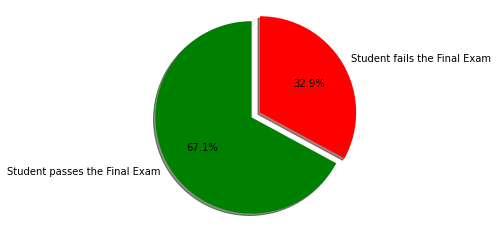

In [12]:
sizes = [df['passed'].value_counts()[1], df['passed'].value_counts()[0]]
l = 'Student passes the Final Exam', 'Student fails the Final Exam' 
colors = ['Green', 'Red']
fig1, ax1 = plt.subplots()
e = [0, 0.1]
plt.pie(sizes, labels = l, colors = colors, autopct = '%1.1f%%', shadow = True, explode = e, startangle = 90)
plt.axis("equal") #both the sides equal
plt.show()

#### a)Correlation Heatmap

##### a.1) General Heatmap

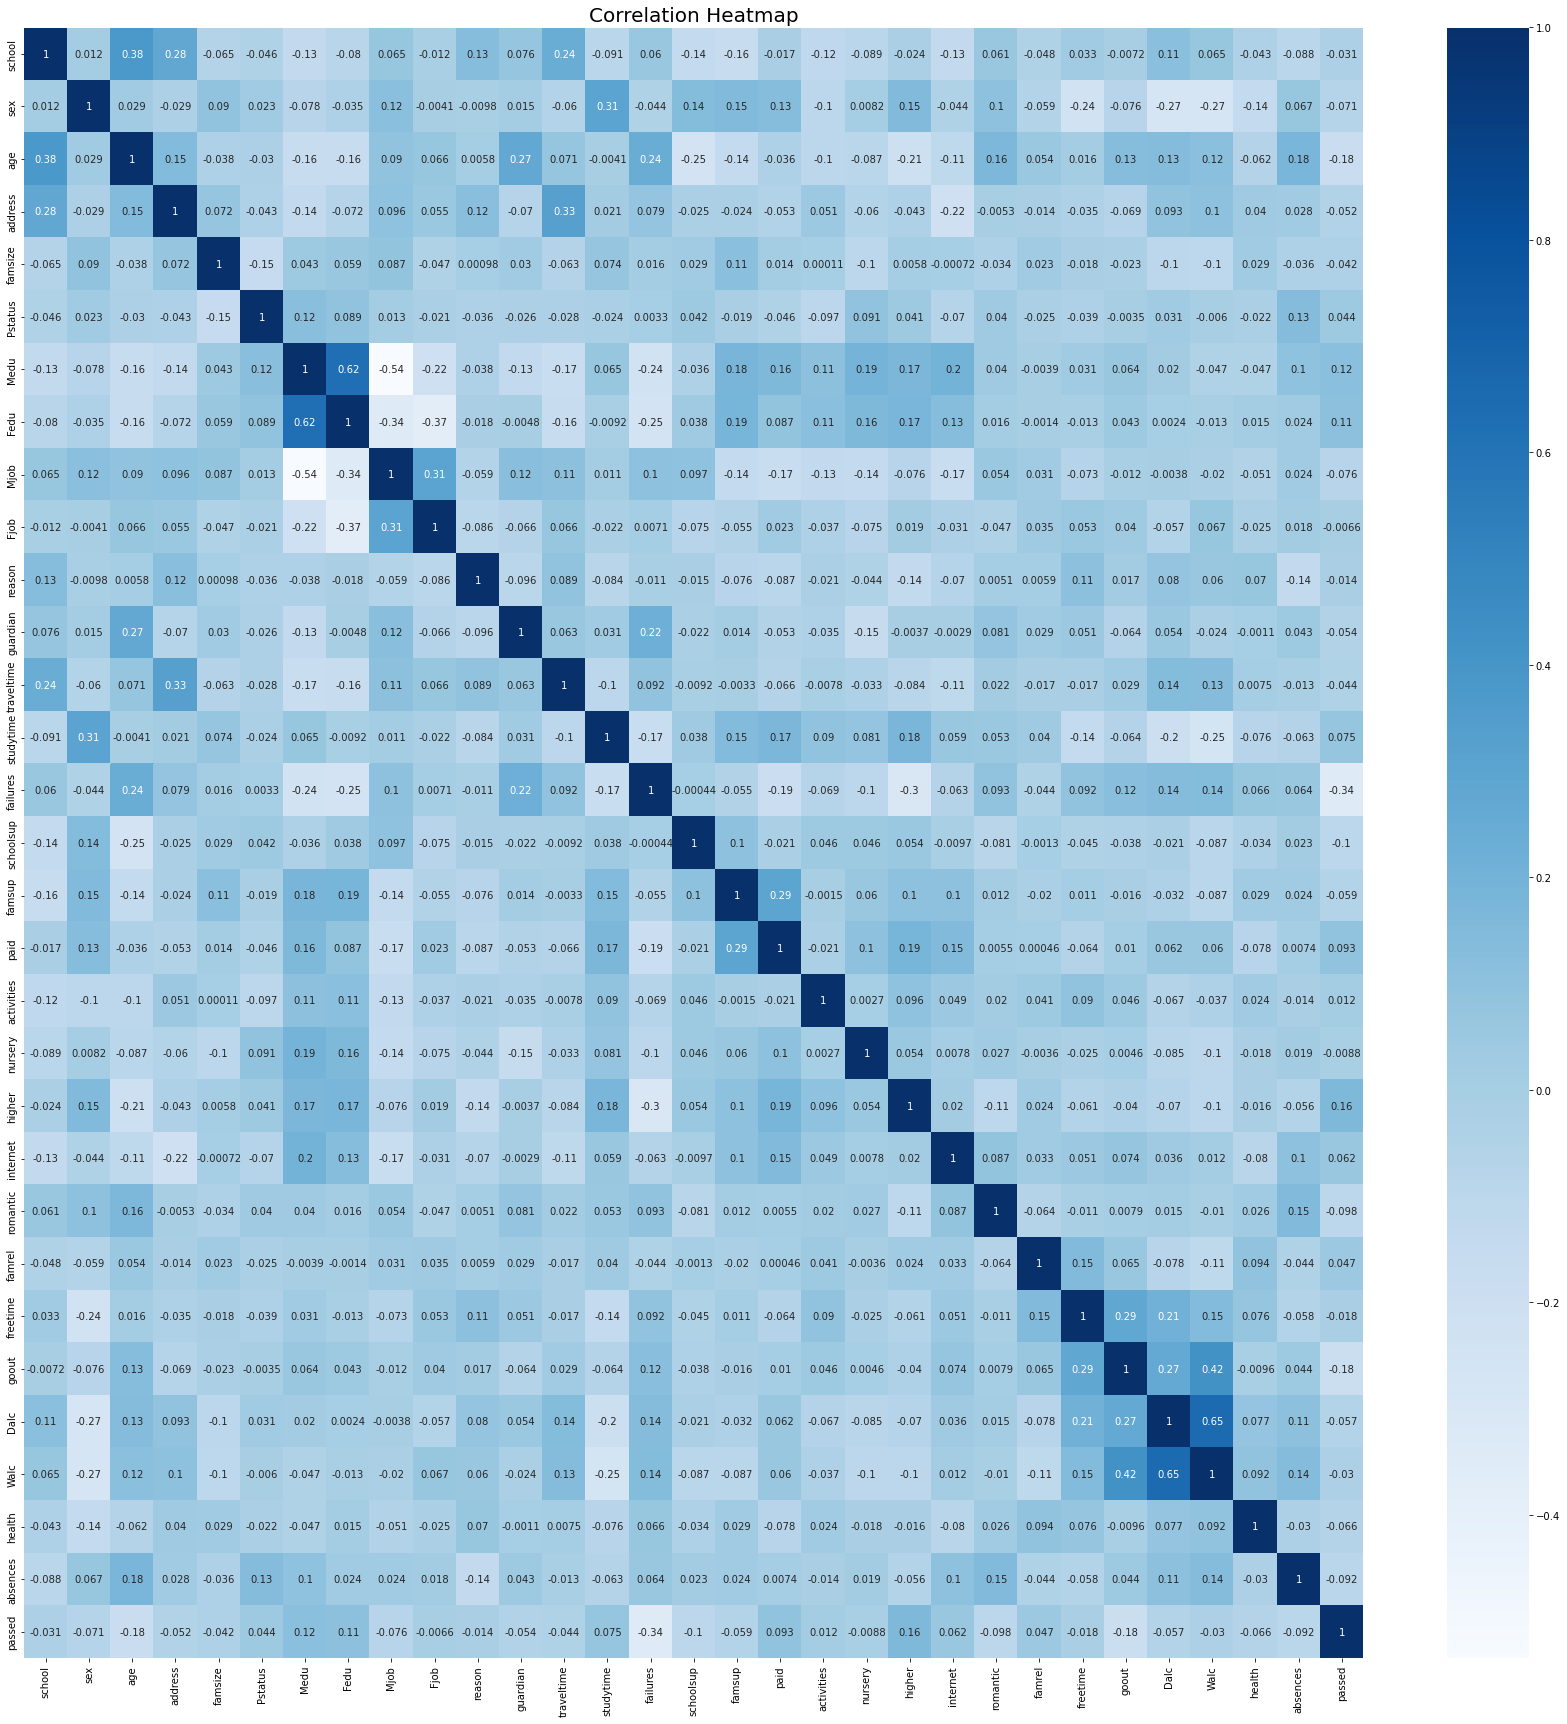

In [13]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "Blues")
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

##### a.2)correlation between student status and other features

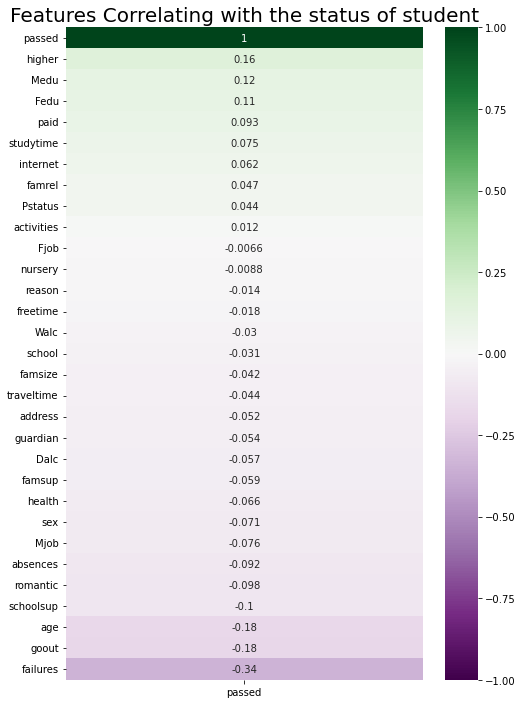

In [14]:
# correlation between student status and other characteristics
plt.figure(figsize = (8, 12))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by = 'passed', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'PRGn')
heatmap.set_title('Features Correlating with the status of student', fontdict = {'fontsize':20});

#### b) Distribution Plot

##### b.1 - Student status by going out

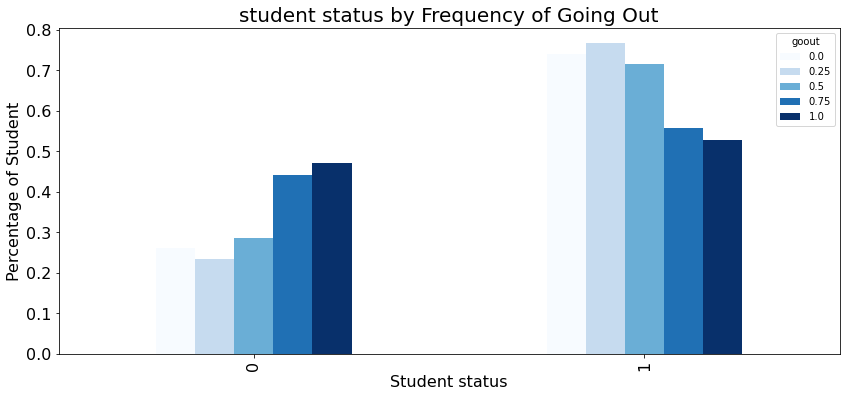

In [15]:
df["goout"].unique()
perc = (lambda col: col/col.sum())
index = [0,1]

out_tab = pd.crosstab(index=df.passed, columns = df.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap = "Blues", fontsize = 16, figsize = (14,6))
plt.title('student status by Frequency of Going Out', fontsize = 20)
plt.ylabel('Percentage of Student', fontsize = 16)
plt.xlabel('Student status', fontsize = 16)
plt.show()

##### b.2 - Student status by desire to take higher education

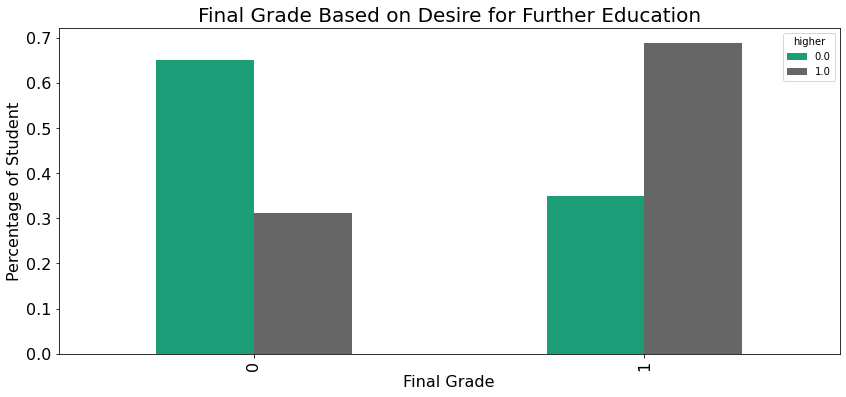

In [16]:
higher_tab = pd.crosstab(index = df.passed, columns = df.higher)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap = "Dark2", figsize = (14,6), fontsize = 16)
plt.title('Final Grade Based on Desire for Further Education', fontsize = 20)
plt.xlabel('Final Grade', fontsize = 16)
plt.ylabel('Percentage of Student', fontsize = 16)
plt.show()

##### b.3 - Student status by failure

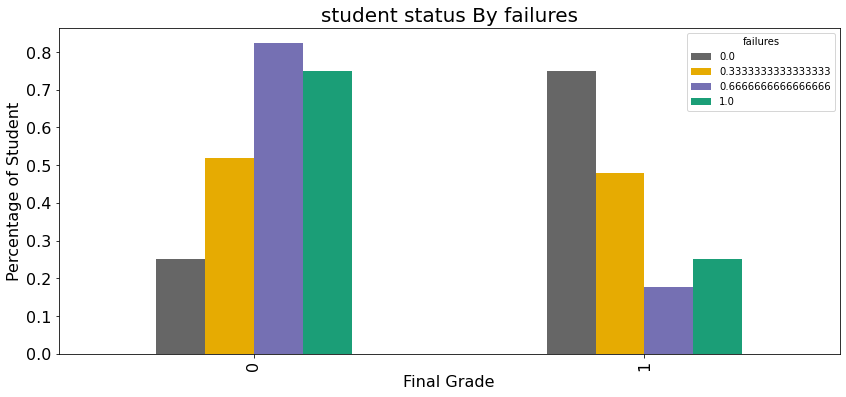

In [17]:
fail_tab = pd.crosstab(index = df.passed, columns = df.failures)
fail_perc = fail_tab.apply(perc).reindex(index)
fail_perc.plot.bar(colormap = "Dark2_r", figsize = (14,6), fontsize = 16)
plt.title('student status By failures', fontsize = 20)
plt.xlabel('Final Grade', fontsize = 16)
plt.ylabel('Percentage of Student', fontsize = 16)
plt.show()

# Training Model 

In [18]:
# Splitting the Data
data = df.to_numpy()
x = data[:, 0:30]
y = data[:, 30]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### 1.KNN

The model  accuracy: 78 %
The training time is:  0ms
The f1 score is : 0.71


 ROC curve: 


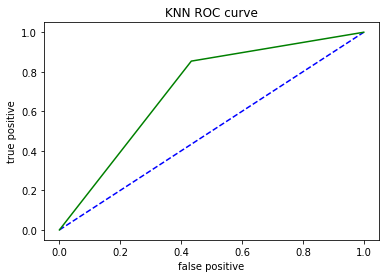

The roc_auc_score is : 0.71
 Confusion Matrix: 


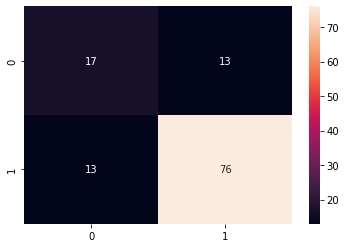

              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57        30
         1.0       0.85      0.85      0.85        89

    accuracy                           0.78       119
   macro avg       0.71      0.71      0.71       119
weighted avg       0.78      0.78      0.78       119



In [19]:
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    KNN = KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    f1 = f1_score(y_test, y_pred, average = 'macro')
    accuracy = accuracy_score(y_test, y_pred)*100
    
    if (accuracy>maxAccuracy and f1>maxF1):
        maxF1 = f1 
        maxAccuracy = accuracy
        optimal_state = split_state
    
    
optimal_state = 71027464

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = optimal_state)
KNN = KNeighborsClassifier()
tic = time()
KNN.fit(X_train,y_train)
toc = time()
y_pred = KNN.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
trainingTime = str(round(1000*(toc-tic))) + "ms"
accuracy = accuracy_score(y_test, y_pred)*100
print('The model  accuracy:', round(accuracy),'%')
print('The training time is: ',trainingTime)
print('The f1 score is :',round(100*f1_score(y_test, y_pred, average='macro'))/100)
    
#ploting the roc_curve

print ( '\n\n ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--', c = 'b')
plt.plot(fpositif,tpositif, c = 'g', label = 'KNN')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('KNN ROC curve')
p = plt.show()

yt_knn, yp_knn= y_test, y_pred
print('The roc_auc_score is :',round(100*roc_auc_score(yt_knn, yp_knn))/100)

#visualizig the confusion matrix:

print (' Confusion Matrix: ')

cm = confusion_matrix(yt_knn, yp_knn)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(yt_knn, yp_knn))

### 2. SVM

In [20]:
def showResults(accuracy, trainingTime, y_pred, model):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    print('\n The ROC curve is :\n')
    fig, _ = plt.subplots()
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    plt.plot([0,1],[0,1],'--', c = 'b')
    plt.plot(fpr, tpr, c = 'g', label = model)
    plt.xlabel('true positive')
    plt.ylabel('false negative')
    plt.legend()
    fig.suptitle('ROC curve: '+str(model))
    plt.show()
    
    print('The model  accuracy:', round(accuracy),'%')
    print('The training time is: ',trainingTime)
    print('The f1 score is :',round(100*f1_score(y_test, y_pred, average='macro'))/100)
    print('The roc_auc_score is :',round(100*roc_auc_score(y_test, y_pred))/100)
    print('The confusion matrix is :\n')
    ax = plt.axes()
    sns.heatmap(confusionMatrix,annot=True)
    print(classification_report(y_test, y_pred))


# Optimal C 
def optimal_C_value():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    minError = float('Inf')
    optimal_C = float('Inf')

    for c in Ci:
        clf = SVC(C=c,kernel='linear')
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_val)
        error = np.mean(np.double(predictions != y_val))
        if error < minError:
            minError = error
            optimal_C = c
    return optimal_C


# ------------------------------------------------------------------------------------------------------------------------------
# Splitting the data for SVM
# Here We will split data into test set, cross validation (X_val, y_val) set and training set
# The cross validation (X_val, y_val) is used for choosing the optimal value for svm parameters C

def split(df,rest_size,test_size,randomState):
    data = df.to_numpy()
    n = data.shape[1]
    x = data[:,0:n-1]
    y = data[:,n-1]
    if(randomState):
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=randomState)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=randomState)
    else:
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=0)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=0)
    
    return X_train,X_val,X_test,y_train,y_val,y_test

#### Linear Kernel in SVM


 The ROC curve is :



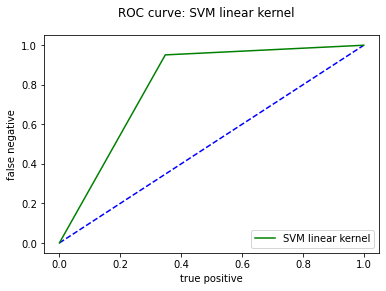

The model  accuracy: 84 %
The training time is:  8ms
The f1 score is : 0.82
The roc_auc_score is : 0.8
The confusion matrix is :

              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75        23
         1.0       0.83      0.95      0.89        41

    accuracy                           0.84        64
   macro avg       0.86      0.80      0.82        64
weighted avg       0.85      0.84      0.84        64



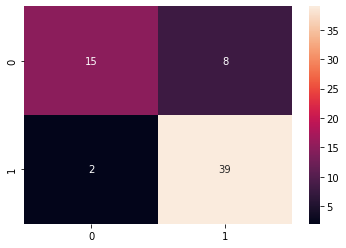

In [21]:
optimal_split_state1 = 0
maxAccuracy = 0
maxF1 = 0

# We already tune parameters, we do not need to loop over all the hyperparamters again, 
# if you want to do so just set max_iteration to 2000 for example 
# and remove the line 'optimal_split_state = 388628375' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------Hyperparameters tunning starts----------------------------------------\n\n')

for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+' Current f1 '+str(maxF1), end="\r")
    # Let's get the optimal C value for the linear kernal
    split_state = np.random.randint(1,1000000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)
    optimal_C = optimal_C_value()


    # Now let's use the optimal C value
    linear_clf = SVC(C=optimal_C,kernel='linear')

    # Let's train the model with the optimal C value and calculate the training time
    tic = time()
    linear_clf.fit(X_train, y_train)
    toc = time()
    time1 = str(round(1000*(toc-tic))) + "ms"
    y_linear = linear_clf.predict(X_test)
    linear_f1 = f1_score(y_test, y_linear, average='macro')
    linear_accuracy = accuracy_score(y_test, y_linear)*100
    if linear_accuracy>maxAccuracy and linear_f1>maxF1:
        maxAccuracy = linear_accuracy
        maxF1 = linear_f1
        optimal_split_state1 = split_state
    if maxAccuracy>86 and maxF1>80:
        break;
        
# We've already tuned our hyperparameters, we will not repeat that again as it takes soo long. 
# The optimal split state for linear kernel is 388628375
# Let's try that split state 
optimal_split_state1 = 388628375
X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
optimal_C = optimal_C_value()


# Now let's use the optimal C value
linear_clf = SVC(C=optimal_C,kernel='linear')

# Let's train the model with the optimal C value and calculate the training time
tic = time()
model = linear_clf.fit(X_train, y_train)
toc = time()
time1 = str(round(1000*(toc-tic))) + "ms"
y_linear = linear_clf.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_linear)*100
if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')

# Let's show the resuls
showResults(linear_accuracy, time1, y_linear,'SVM linear kernel')

In [22]:
#save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [23]:
X_test

array([[ 1.        ,  0.        ,  0.01380898, ...,  0.75      ,
         0.25      , -0.03611814],
       [ 0.        ,  0.        , -0.03164557, ...,  0.        ,
         0.5       , -0.07611814],
       [ 0.        ,  0.        , -0.07710012, ...,  0.25      ,
         1.        , -0.04945148],
       ...,
       [ 0.        ,  1.        , -0.03164557, ...,  0.        ,
         0.5       , -0.07611814],
       [ 0.        ,  1.        , -0.07710012, ...,  0.        ,
         0.        , -0.07611814],
       [ 0.        ,  0.        , -0.03164557, ...,  1.        ,
         0.75      ,  0.11054852]])

In [24]:
load_model = pickle.load(open(filename,'rb'))

In [25]:
answer = load_model.predict(X_test)

In [26]:
X_test

array([[ 1.        ,  0.        ,  0.01380898, ...,  0.75      ,
         0.25      , -0.03611814],
       [ 0.        ,  0.        , -0.03164557, ...,  0.        ,
         0.5       , -0.07611814],
       [ 0.        ,  0.        , -0.07710012, ...,  0.25      ,
         1.        , -0.04945148],
       ...,
       [ 0.        ,  1.        , -0.03164557, ...,  0.        ,
         0.5       , -0.07611814],
       [ 0.        ,  1.        , -0.07710012, ...,  0.        ,
         0.        , -0.07611814],
       [ 0.        ,  0.        , -0.03164557, ...,  1.        ,
         0.75      ,  0.11054852]])

In [27]:
for element in answer:
    if element == 1:
        print("Pass")
    else:
        print("Fail")

Pass
Pass
Pass
Pass
Pass
Fail
Fail
Pass
Fail
Pass
Pass
Pass
Pass
Pass
Pass
Fail
Pass
Pass
Pass
Pass
Pass
Fail
Pass
Fail
Pass
Pass
Pass
Pass
Fail
Pass
Pass
Pass
Pass
Fail
Pass
Pass
Pass
Pass
Pass
Pass
Fail
Fail
Fail
Pass
Fail
Pass
Pass
Fail
Pass
Fail
Pass
Fail
Pass
Pass
Fail
Pass
Pass
Pass
Fail
Pass
Pass
Pass
Pass
Pass


In [28]:
!pip install gradio

In [29]:
import gradio as gr


In [30]:
def featureScaling(min_val,max_val,mean,val):
    if(val>6):
        val = (val-mean)/(max_val)
        return val
  
    elif(val<6):
        val = (val-min_val)
        val = val/max_val
        return val
    
def make_prediction(school,sex, age, address, famsize, Pstatus, Medu, Fedu,Mjob, Fjob, reason, guardian, traveltime, studytime,failures, 
                    schoolsup, famsup, paid, activities, nursery,higher,internet, romantic,famrel, freetime,goout,Dalc,Walc,health,absences,
                    ):
    age = featureScaling(15,22,16.696,age) 
    Medu = featureScaling(0,4,2.749367,Medu) 
    Fedu = featureScaling(0,4,2.521519,Fedu) 
    Mjob = featureScaling(0,4,1,Mjob)
    Fjob = featureScaling(0,4,1,Fjob)
    reason = featureScaling(0,3,1,reason)
    guardian = featureScaling(0,2,1,guardian)
    traveltime = featureScaling(1,4,1.448101,traveltime) 
    studytime = featureScaling(1,4,2.035443	,studytime) 
    failures = featureScaling(0,3,0.334177,failures) 
    famrel = featureScaling(1,5,3.944304,famrel)
    freetime = featureScaling(1,5,3.235443,freetime)
    goout = featureScaling(1,5,3.108861,goout)
    Dalc = featureScaling(1,5,1.481013,Dalc)
    Walc = featureScaling(1,5,2.291139,Walc)
    health = featureScaling(1,5,3.554430,health)
    absences = featureScaling(0,93,5.708861,absences)
  
  #with open("filename.pkl", "rb") as f:
   # clf  = pickle.load(f)
    input_array = np.array([[school,sex,age,address, famsize, Pstatus, Medu,Fedu,Mjob, Fjob, reason, guardian, traveltime,studytime,failures,schoolsup, famsup, paid, activities,nursery,higher,internet, romantic,famrel,freetime,goout,Dalc,Walc,health,absences]])
    preds = linear_clf.predict(input_array)
    for element in preds:
        if element == 1:
            return "You will Pass the exams"
        else:
            return "You will fail the exam"
  
    
#Create the input component for Gradio 

school = gr.Number(label = "Enter School{0: DSU,1:others")
sex = gr.Number(label = "Enter sex {1:For Female, 0: For Male}")
age = gr.Number(label = "Enter Age")
address = gr.Number(label = "Enter Address {1:For Rural, 0: For Urban}")
famsize = gr.Number(label = "Enter Family Size {1:For greater than 3, 0: For less than 3}")
Pstatus = gr.Number(label = "Enter Pstatus {T: 0, A: 1}")
Medu = gr.Number(label = "Enter Medu {0:none, 1:primary education (4th grade), 2: 5th to 9th grade, 3:secondary education and 4:higher education}")
Fedu = gr.Number(label = "Enter Fedu {0:none, 1:primary education (4th grade), 2: 5th to 9th grade, 3:secondary education and 4:higher education}")
Mjob= gr.Number(label = "Enter Mjob {0:teacher, 1:health , 2:servicce , 3:at home and 4:other}")
Fjob =gr.Number(label = "Enter Fjob {0:teacher, 1:health , 2:servicce , 3:at home and 4:other}")
reason = gr.Number(label = "Enter reason {0: home, 1:reputation, 2:course and 3:other}")
guardian = gr.Number(label = "Enter gaurdian {0:mother, 1:father and 2:other}")
traveltime = gr.Number(label = "Enter traveltime {1:<15 min, 2:15 to 30 min, 3: 30 min to 1 hour, and  4: >1hour}")
studytime = gr.Number(label = "Enter studytime {1:<2 hours, 2:2 to 5 hours, 3:5 to 10 hours, and 4:>10 hours}")
failures = gr.Number(label = "Enter failures ")
schoolsup = gr.Number(label = "Enter schoolsup {0:no and 1:yes}")
famsup = gr.Number(label = "Enter famsup {0:no and 1:yes}")
paid = gr.Number(label = "Enter extra paid classes {0:no and 1:yes}")
activities = gr.Number(label = "Enter extra-curricular activities {0:no and 1:yes}")
nursery = gr.Number(label = "Enter attended nursery school{0:no and 1:yes}")
higher = gr.Number(label = "wants to take higher education {0:no and 1:yes}")
internet = gr.Number(label = "Internet access at home {0:no and 1:yes}")
romantic = gr.Number(label = "In a romantic relationship {0:no and 1:yes}")
famrel = gr.Number(label = "Quality of family relationships{Enter a number from 1 - very bad to 5 - excellent}")
freetime = gr.Number(label = "free time after school{Enter a number from 1 - very bad to 5 - excellent}")
goout = gr.Number(label = "Going out with friends {Enter a number from 1 - very low to 5 - very high}")
Dalc = gr.Number(label = "Dalc - workday alcohol consumption {Enter a number from 1 - very low to 5 - very high}")
Walc =gr.Number(label = "Walc - weekend alcohol consumption {Enter a number from 1 - very low to 5 - very high}")
health = gr.Number(label = "Health - current health status {Enter a number from 1 - very bad to 5 - very good}")
absences = gr.Number(label = "number of school absences {Enter a number from 0 to 93}")
#passed = gr.Number(label= "Passed in previous years {1:Yes, 0:No}")
                    

# We create the output
#output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[school,sex, age, address, famsize, Pstatus, Medu, Fedu,Mjob, Fjob, reason, guardian, traveltime, studytime,failures, 
                    schoolsup, famsup, paid, activities, nursery,higher,internet, romantic,famrel, freetime,goout,Dalc,Walc,health,absences,
                    ], outputs="text",title="Students performance and difficulties prediction")
app.launch(debug = False)




Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
